In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from random import random
from matplotlib import pyplot as plt
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.dates as mdates

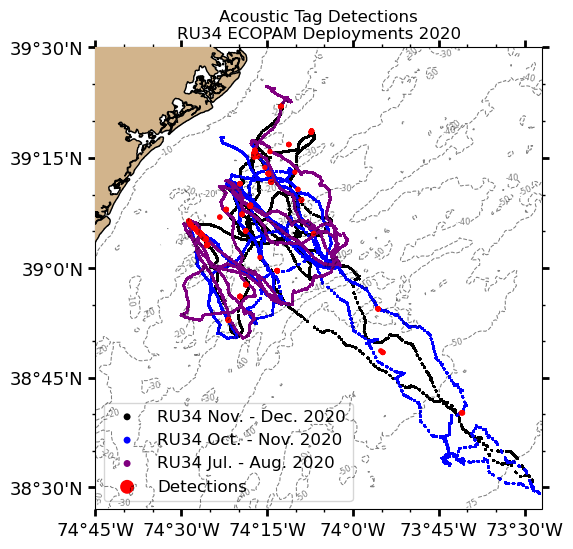

In [2]:
# RU34 ECO-PAM Glider Mission Nov - Oct 2020
url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-19T16%3A41%3A01Z&time%3C=2020-12-21T15%3A51%3A16Z' 
M1Y2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
# RU34 ECO-PAM Glider Mission Oct - Nov 2020
url1  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201003T1821-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-03T18%3A21%3A59Z&time%3C=2020-11-05T16%3A39%3A00Z' 
M2Y2020 = pd.read_csv(url1, sep=',', skiprows=range(1, 2), parse_dates=['time'])
# RU34 ECO-PAM Glider Mission Jul - Aug 2020
url2  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20200729T1430-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-07-29T16%3A05%3A40Z&time%3C=2020-08-26T14%3A59%3A27Z' 
M3Y2020 = pd.read_csv(url2, sep=',', skiprows=range(1, 2), parse_dates=['time'])

# Read in file path for 2020 qualified tag detections
CSV = 'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2020V2/ecopam_qualified_detections_2020.csv'
Detections2020 = pd.read_csv(CSV, sep=',', skiprows=range(1, 2), parse_dates=['datecollected'])

# Set Extent of Map
extent     = [-74.75, -73.45, 38.45, 39.5]
# Set Marker size
markersize = 10;

# Create the plot with the Mercator projections
fig,ax  = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-75, -50, -40, -30, -20, -10), figsize=(10,6), oceancolor='w')

# Plot the glider tracks
ax_posi = plt.scatter(M1Y2020['longitude'],M1Y2020['latitude'],c='black', s=markersize, marker=".", edgecolors='none', transform=ccrs.PlateCarree(), label = 'RU34 Nov. - Dec. 2020')
ax_posi = plt.scatter(M2Y2020['longitude'],M2Y2020['latitude'],c='blue', s=markersize, marker=".", edgecolors='none', transform=ccrs.PlateCarree(), label = 'RU34 Oct. - Nov. 2020')
ax_posi = plt.scatter(M3Y2020['longitude'],M3Y2020['latitude'],c='purple', s=markersize, marker=".", edgecolors='none', transform=ccrs.PlateCarree(), label = 'RU34 Jul. - Aug. 2020')
# Plot the detections
ax_posi = plt.scatter(Detections2020['longitude'], Detections2020['latitude'], color='red', s=15, marker="o",edgecolors='none', transform=ccrs.PlateCarree(), label='Detections2020')

# Create Legend
legend = ax.legend(['RU34 Nov. - Dec. 2020', 'RU34 Oct. - Nov. 2020', 'RU34 Jul. - Aug. 2020', 'Detections'], loc='lower left', fontsize='large', scatterpoints=1)
for lh in legend.legendHandles:
    lh._sizes = [100]
plt.title('Acoustic Tag Detections\nRU34 ECOPAM Deployments 2020');
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Acoustic Tag Detections RU34 ECOPAM Deployments 2020.png', dpi=300, bbox_inches='tight')

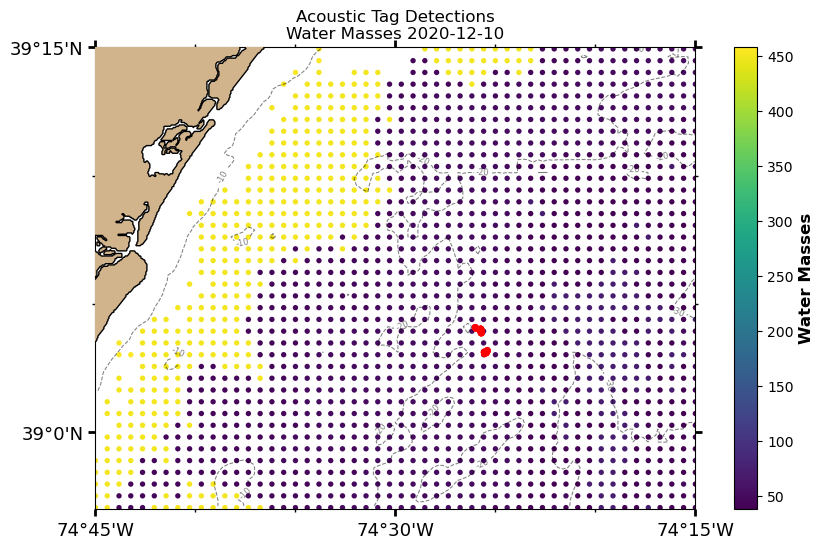

In [3]:
# Satellite data on 12/10/2020 (date with second most unique field numbers detected/ first had no no satellite coverage)
url  = 'https://basin.ceoe.udel.edu//erddap/griddap/MODIS_AQUA_1_day.csv?M_WK%5B(2020-12-10T23:59:59Z)%5D%5B(37.003781441531665):(43.39925597487844)%5D%5B(-77.79835967193439):(-69.79995999199839)%5D&.draw=surface&.vars=longitude%7Clatitude%7CM_WK&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff'
MODIS1DAYDEC09 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
MODIS1DAYDEC09

# Convert satellite data time to datetime
date = pd.to_datetime(MODIS1DAYDEC09['time'], errors='coerce') ; date

# RU34 ECO-PAM Glider Mission Nov - Oct 2020 
url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T15%3A51%3A16Z' 
M1Y2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
M1Y2020

# 2020 Qualified Tag Detections
CSV = 'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2020/ecopam_qualified_detections_2020.csv'
Detections2020 = pd.read_csv(CSV, sep=',', skiprows=range(1, 2), parse_dates=['datecollected'])
# Change detection data to datetime
Detections2020['datecollected'] = pd.to_datetime(Detections2020['datecollected'])

# Get Detections data for 12/10/2020
Detection_data_for_date = Detections2020[Detections2020['datecollected'].dt.date == pd.to_datetime('2020-12-10').date()]

# Convert time column to datetime 
M1Y2020['time'] = pd.to_datetime(M1Y2020['time'])

# Get Data from RU34 ECO-PAM Glider Mission Nov - Oct 2020 
Glider_data_for_date = M1Y2020[M1Y2020['time'].dt.date == pd.to_datetime('2020-12-10').date()]

# Assign each fieldnumber a numerical value for graphing purposes
Detections2020['fieldnumber_code'] = Detections2020['fieldnumber'].astype('category').cat.codes

# Set extent of map (Still messing with this, I would like to zoom in more so I can color by tag ID or species)
extent     = [-74.75, -74.25, 38.95, 39.25]
# Set marker size( will need to make larger as I zoom in)
markersize = 35;

# Create the plot with the Mercator projections
fig,ax  = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-75, -50, -40, -30, -20, -10), figsize=(10,6), oceancolor='w')

#### Plot the Detections from 12/10/2020 over the Water Mass Satellite data to show a visual representation of what I will be doing
# Plot satellite Water Mass Data from 12/10/2020
ax_posi = plt.scatter(MODIS1DAYDEC09['longitude'],MODIS1DAYDEC09['latitude'],s=15, c=MODIS1DAYDEC09['M_WK'], marker="o", edgecolors='none', transform=ccrs.PlateCarree())
cb= plt.colorbar()
cb.set_label('Water Masses', fontsize = 12 ,fontweight='bold')
# Plot Qualified Tag Detection data from 12/10/2020
ax_posi = plt.scatter(Detection_data_for_date['longitude'], Detection_data_for_date['latitude'], color='red', s=25, marker="o", edgecolors='none', transform=ccrs.PlateCarree())
# Plot the Glider Track
ax_posi = plt.scatter(Glider_data_for_date['longitude'],Glider_data_for_date['latitude'],c='black', s=markersize, marker=".", edgecolors='none', transform=ccrs.PlateCarree())


plt.title('Acoustic Tag Detections\nWater Masses 2020-12-10');
plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Acoustic Tag Detections Water Masses 2020-12-10.png', dpi=300, bbox_inches='tight')